**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**


# Importing Libraries


In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go

import plotly.subplots as make_subplots
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [414]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics


In [466]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout

In [534]:
data=pd.read_csv('/Users/harshshivhare/Downloads/customer_churn.csv')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Analysis

In [68]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [30]:
males=data[data['gender']=='Male'].count()[1]
female=data[data['gender']=='Female'].count()[1]


<AxesSubplot:ylabel='gender'>

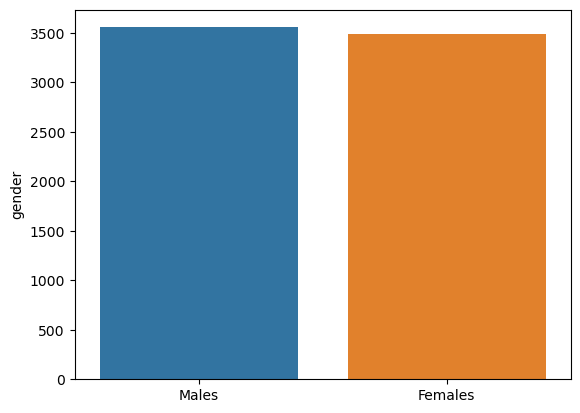

In [31]:
g_lables=['Males','Females']
sns.barplot(y=dff,x=g_lables)


In [32]:
YES=data['Churn'][data['Churn']=='Yes'].groupby(by=data['gender']).count()
NO=data['Churn'][data['Churn']=='No'].groupby(by=data['gender']).count()

# YES=df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()


In [84]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

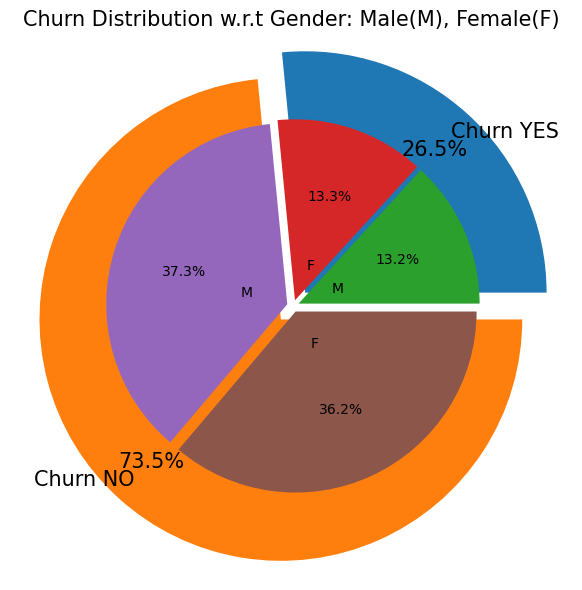

In [125]:
plt.figure(figsize=(6,6))
labels=['Churn YES','Churn NO']
values=[1869,5174]
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
labels_x=['M','F','M','F']
values_x=[930,939,2625,2549]
plt.pie(values,labels=labels,radius=4,autopct='%1.1f%%',labeldistance=0.9,pctdistance=0.8,textprops={"fontsize":15},explode=explode,counterclock = True)
plt.pie(values_x,labels=labels_x,radius=3,autopct='%1.1f%%',labeldistance=0.2,explode =explode_gender,counterclock = True)



plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.0)
plt.axis('equal')
plt.tight_layout()
plt.show()



In [85]:
NO

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [63]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [163]:
g_labels=['Females','Males']
c_labels=['YES','NO']
# fig,ax=plt.subplots(1,2)
fig=make_subplots(rows=1,cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]])
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=data['gender'].value_counts(),labels=g_labels,name='Gender'),1,1)
fig.add_trace(go.Pie(values=data['Churn'].value_counts(),labels=c_labels,name='Churn'),1,2)


fig.update_traces(hole=.4, textfont_size=16)


fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])
# ax[0].pie(x=data['gender'].value_counts(),labels=g_labels[::-1],autopct=lambda p: '{:.2f}%'.format(p))
# ax[0].label(g_labels)
# ax[1].pie(x=data['Churn'].value_counts(),labels=c_labels[::-1],autopct=lambda p: '{:.2f}%'.format(p))
# ax[1].label(c_labels)
# fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)






# plt.subplots(1,2)
# plt.pie(YES)
# plt.pie(NO)
fig.show()
# # plt.xlabel(label)

In [152]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [154]:
lines=data['MultipleLines'].value_counts()
phone=data['PhoneService'].value_counts()
internet=data['InternetService'].value_counts()
online=data['OnlineSecurity'].value_counts()
backup=data['OnlineBackup'].value_counts()
protect=data['DeviceProtection'].value_counts()
support=data['TechSupport'].value_counts()
TV=data['StreamingTV'].value_counts()
movies=data['StreamingMovies'].value_counts()
contract=data['Contract'].value_counts()
paperless=data['PaperlessBilling'].value_counts()
paymentmethod=data['PaymentMethod'].value_counts()






In [184]:
data['OnlineSecurity'][data['OnlineSecurity']=='No internet service']='No'
data['OnlineBackup'][data['OnlineBackup']=='No internet service']='No'
data['DeviceProtection'][data['DeviceProtection']=='No internet service']='No'
data['TechSupport'][data['TechSupport']=='No internet service']='No'
data['StreamingTV'][data['StreamingTV']=='No internet service']='No'
data['StreamingMovies'][data['StreamingMovies']=='No internet service']='No'

In [221]:
labels=['Yes','No']
fig=px.histogram(x=data['OnlineSecurity'],data['TechSupport'],category_orders=labels)
# fig=px.histogram(x=data['DeviceProtection'].values,category_orders=labels)
fig.show()

In [217]:
fig=px.histogram(data,x='Churn',barmode='group',color='Contract',title="<b>Customer contract distribution<b>")
fig.show()

In [224]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [250]:
(data['SeniorCitizen'].groupby(by=data['Churn']).value_counts())

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64

In [235]:
666+476

1142

In [246]:
fig=px.histogram(data,x='Churn',color='SeniorCitizen')
fig.show()

In [276]:
data[data['gender']=='Female'][['Churn','InternetService']].value_counts()

Churn  InternetService
No     DSL                969
       Fiber optic        889
       No                 691
Yes    Fiber optic        664
       DSL                219
       No                  56
dtype: int64

In [275]:
data[data['gender']=='Male'][['Churn','InternetService']].value_counts()

Churn  InternetService
No     DSL                993
       Fiber optic        910
       No                 722
Yes    Fiber optic        633
       DSL                240
       No                  57
dtype: int64

In [282]:
labels=['DSL','Fiber optic','No']
fig=go.Figure()
fig.add_trace(go.Bar(x=[['Churn : Yes','Churn :Yes','Churn:No','Churn :No'],
                     ['Female','Male','Female','Male']],
                    y=[219,240,969,993],name='DSL',))

fig.add_trace(go.Bar(x=[['Churn : Yes','Churn :Yes','Churn:No','Churn :No'],
                     ['Female','Male','Female','Male']],
                    y=[664,633,889,910],name='Fiber optic',))

fig.add_trace(go.Bar(x=[['Churn : Yes','Churn :Yes','Churn:No','Churn :No'],
                     ['Female','Male','Female','Male']],
                    y=[56,57,691,722],name='No',))



In [299]:
labels=['DSL','Fiber optic','No']
fig=px.histogram(data['InternetService'],color=data['Churn')
fig.show()

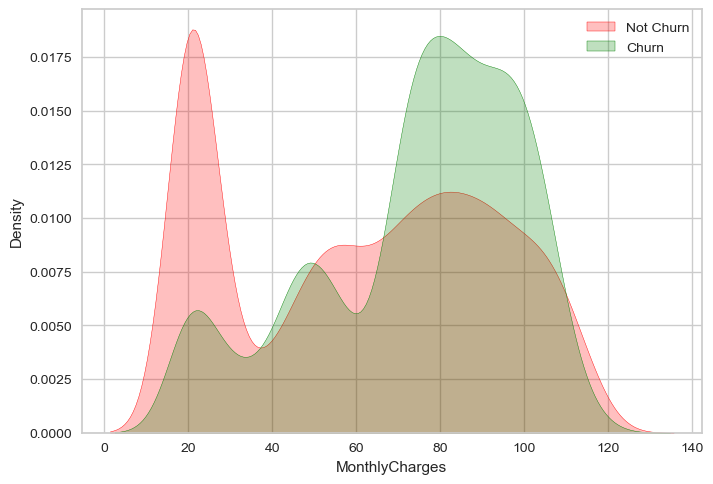

In [535]:
ax=sns.kdeplot(data['MonthlyCharges'][(data["Churn"] == 'No')],color='red',shade=True)
ax=sns.kdeplot(data['MonthlyCharges'][(data["Churn"] == 'Yes')],color='green',shade=True)
ax.legend(['Not Churn','Churn'])

In [530]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,1,...,1,1,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,1,...,1,1,1,1,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,1,0,1,1,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,1,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [528]:
data['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [538]:
data['TotalCharges'][(data["Churn"] == 'No')]

0         29.85
1        1889.5
3       1840.75
6        1949.4
7         301.9
         ...   
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7042     6844.5
Name: TotalCharges, Length: 5174, dtype: object

In [348]:
fig=px.box(x=data['Churn'],y=data['tenure'])
fig.update_xaxes(title_text='Churn')
fig.update_yaxes(title_text='Tenure')
fig.show()

In [539]:
def tonumeric(datasereis):
    if datasereis.dtype == 'object':
        datasereis=LabelEncoder().fit_transform(datasereis)
        LabelEncoder().get_params()
    return datasereis    

In [540]:
data=data.apply(lambda x:tonumeric(x))
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [402]:
data11=data.apply(lambda x:LabelEncoder().
                  get_params(x))


In [404]:
data11

customerID          {}
gender              {}
SeniorCitizen       {}
Partner             {}
Dependents          {}
tenure              {}
PhoneService        {}
MultipleLines       {}
InternetService     {}
OnlineSecurity      {}
OnlineBackup        {}
DeviceProtection    {}
TechSupport         {}
StreamingTV         {}
StreamingMovies     {}
Contract            {}
PaperlessBilling    {}
PaymentMethod       {}
MonthlyCharges      {}
TotalCharges        {}
Churn               {}
dtype: object

In [385]:
data['PaymentMethod']

0       2
1       3
2       3
3       0
4       2
       ..
7038    3
7039    1
7040    2
7041    3
7042    0
Name: PaymentMethod, Length: 7043, dtype: int64

In [541]:
data.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [542]:
X=data.drop(columns='Churn')
Y=data['Churn'].values

# Model Training using Machine Learning Algorithms

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 40)

Random Forest Classifier

In [557]:
model=RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model.fit(X_train,y_train)

preds=model.predict(X_test)
print (metrics.accuracy_score(y_test, preds))

0.7998580553584103


In [558]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

In [559]:
model=RandomForestClassifier()
model = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 3,
                               verbose=2, 
                               
                               random_state=42, n_jobs = -1)

In [560]:
model.fit(X_train,y_train)
preds2=model.predict(X_test)
print (metrics.accuracy_score(y_test, preds2))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/harshshivhare/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   4.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   3.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   8.5s
[CV] END bootstrap=True, max_depth=80

In [561]:
model.best_params_


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

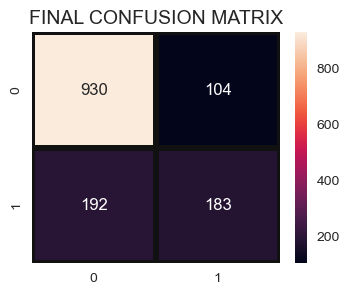

In [455]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [556]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

NameError: name 'model_rf' is not defined

In [494]:
y_test

array([0, 1, 0, ..., 1, 0, 1])

# Model Training by different parameters

In [495]:
X_train1=X_train['tenure']
X_test1=X_test['tenure']

In [496]:
X_train1

1642    29
307     29
6120     6
6906    25
3920    71
        ..
3064    21
6309    71
6151     9
6363     9
3398    61
Name: tenure, Length: 5634, dtype: int64

In [499]:
model=Sequential()
model.add(Input(1))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,"sigmoid"))

model.compile(loss="binary_crossentropy",metrics="accuracy",optimizer='adam')

model.fit(x=X_train1,y=y_train,validation_data=(X_test1, y_test),epochs=150)



Epoch 1/150
177/177 [==============================] - 0s 810us/step - loss: 0.6753 - accuracy: 0.7348 - val_loss: 0.6588 - val_accuracy: 0.7339
Epoch 2/150
177/177 [==============================] - 0s 507us/step - loss: 0.6453 - accuracy: 0.7348 - val_loss: 0.6336 - val_accuracy: 0.7339
Epoch 3/150
177/177 [==============================] - 0s 497us/step - loss: 0.6240 - accuracy: 0.7348 - val_loss: 0.6154 - val_accuracy: 0.7339
Epoch 4/150
177/177 [==============================] - 0s 488us/step - loss: 0.6084 - accuracy: 0.7348 - val_loss: 0.6028 - val_accuracy: 0.7339
Epoch 5/150
177/177 [==============================] - 0s 479us/step - loss: 0.5975 - accuracy: 0.7348 - val_loss: 0.5940 - val_accuracy: 0.7339
Epoch 6/150
177/177 [==============================] - 0s 495us/step - loss: 0.5903 - accuracy: 0.7348 - val_loss: 0.5884 - val_accuracy: 0.7339
Epoch 7/150
177/177 [==============================] - 0s 497us/step - loss: 0.5856 - accuracy: 0.7348 - val_loss: 0.5846 - val_ac

177/177 [==============================] - 0s 474us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_accuracy: 0.7339
Epoch 114/150
177/177 [==============================] - 0s 481us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_accuracy: 0.7339
Epoch 115/150
177/177 [==============================] - 0s 491us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_accuracy: 0.7339
Epoch 116/150
177/177 [==============================] - 0s 491us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_accuracy: 0.7339
Epoch 117/150
177/177 [==============================] - 0s 510us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_accuracy: 0.7339
Epoch 118/150
177/177 [==============================] - 0s 489us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_accuracy: 0.7339
Epoch 119/150
177/177 [==============================] - 0s 497us/step - loss: 0.5784 - accuracy: 0.7348 - val_loss: 0.5794 - val_ac

In [500]:
model2=Sequential()
model2.add(Input(1))
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss="binary_crossentropy",metrics="accuracy",optimizer='adam')

model2.fit(x=X_train1,y=y_train,validation_data=(X_test1, y_test),epochs=150)

Epoch 1/150
177/177 [==============================] - 0s 838us/step - loss: 0.6718 - accuracy: 0.7094 - val_loss: 0.6664 - val_accuracy: 0.6749
Epoch 2/150
177/177 [==============================] - 0s 555us/step - loss: 0.5457 - accuracy: 0.7394 - val_loss: 0.5493 - val_accuracy: 0.7466
Epoch 3/150
177/177 [==============================] - 0s 556us/step - loss: 0.5273 - accuracy: 0.7481 - val_loss: 0.5445 - val_accuracy: 0.7488
Epoch 4/150
177/177 [==============================] - 0s 531us/step - loss: 0.5196 - accuracy: 0.7535 - val_loss: 0.5529 - val_accuracy: 0.7488
Epoch 5/150
177/177 [==============================] - 0s 540us/step - loss: 0.5182 - accuracy: 0.7543 - val_loss: 0.5434 - val_accuracy: 0.7488
Epoch 6/150
177/177 [==============================] - 0s 550us/step - loss: 0.5154 - accuracy: 0.7428 - val_loss: 0.5403 - val_accuracy: 0.7488
Epoch 7/150
177/177 [==============================] - 0s 549us/step - loss: 0.5168 - accuracy: 0.7371 - val_loss: 0.5280 - val_ac

177/177 [==============================] - 0s 558us/step - loss: 0.5092 - accuracy: 0.7542 - val_loss: 0.5300 - val_accuracy: 0.7459
Epoch 114/150
177/177 [==============================] - 0s 541us/step - loss: 0.5081 - accuracy: 0.7503 - val_loss: 0.5305 - val_accuracy: 0.7488
Epoch 115/150
177/177 [==============================] - 0s 526us/step - loss: 0.5060 - accuracy: 0.7542 - val_loss: 0.5228 - val_accuracy: 0.7488
Epoch 116/150
177/177 [==============================] - 0s 532us/step - loss: 0.5061 - accuracy: 0.7551 - val_loss: 0.5266 - val_accuracy: 0.7488
Epoch 117/150
177/177 [==============================] - 0s 530us/step - loss: 0.5069 - accuracy: 0.7567 - val_loss: 0.5282 - val_accuracy: 0.7488
Epoch 118/150
177/177 [==============================] - 0s 541us/step - loss: 0.5055 - accuracy: 0.7568 - val_loss: 0.5256 - val_accuracy: 0.7488
Epoch 119/150
177/177 [==============================] - 0s 535us/step - loss: 0.5067 - accuracy: 0.7545 - val_loss: 0.5309 - val_ac

In [501]:
X_train3=X_train[{'tenure','MonthlyCharges','TotalCharges'}]
X_test3=X_test[{'tenure','MonthlyCharges','TotalCharges'}]

In [502]:
X_train3

,tenure,MonthlyCharges,TotalCharges
1642,29,19.85,4728
307,29,75.55,1683
6120,6,59.45,3092
6906,25,18.70,3279
3920,71,86.40,5033
...,...,...,...
3064,21,68.65,888
6309,71,25.60,1463
6151,9,71.00,5330
6363,9,74.85,5556


In [516]:
model3=Sequential()
model3.add(Input(3,))
model3.add(Dense(16,activation='relu'))
model2.add(Dropout(0.1))
# model2.add(Dense(50,activation='relu'))
# model2.add(Dropout(0.2))
# model2.add(Dense(8,activation='relu'))
                 
model3.add(Dense(1,activation='sigmoid'))

model3.compile(loss="BinaryCrossentropy",metrics="accuracy",optimizer='adam')

model3.fit(x=X_train3,y=y_train,validation_data=(X_test3, y_test),epochs=150,batch_size=25)

Epoch 1/150
226/226 [==============================] - 0s 674us/step - loss: 35.5770 - accuracy: 0.7158 - val_loss: 1.0193 - val_accuracy: 0.7445
Epoch 2/150
226/226 [==============================] - 0s 454us/step - loss: 0.8347 - accuracy: 0.7277 - val_loss: 0.6318 - val_accuracy: 0.7672
Epoch 3/150
226/226 [==============================] - 0s 455us/step - loss: 0.8276 - accuracy: 0.7142 - val_loss: 0.6328 - val_accuracy: 0.7076
Epoch 4/150
226/226 [==============================] - 0s 449us/step - loss: 0.8916 - accuracy: 0.7103 - val_loss: 0.5824 - val_accuracy: 0.6998
Epoch 5/150
226/226 [==============================] - 0s 445us/step - loss: 0.6692 - accuracy: 0.7284 - val_loss: 0.7799 - val_accuracy: 0.7367
Epoch 6/150
226/226 [==============================] - 0s 460us/step - loss: 0.9592 - accuracy: 0.7153 - val_loss: 0.6094 - val_accuracy: 0.7133
Epoch 7/150
226/226 [==============================] - 0s 453us/step - loss: 0.7619 - accuracy: 0.7368 - val_loss: 0.8322 - val_a

226/226 [==============================] - 0s 475us/step - loss: 0.6366 - accuracy: 0.7462 - val_loss: 0.6847 - val_accuracy: 0.7424
Epoch 114/150
226/226 [==============================] - 0s 509us/step - loss: 0.5891 - accuracy: 0.7433 - val_loss: 0.5042 - val_accuracy: 0.7644
Epoch 115/150
226/226 [==============================] - 0s 462us/step - loss: 0.5985 - accuracy: 0.7471 - val_loss: 0.5004 - val_accuracy: 0.7700
Epoch 116/150
226/226 [==============================] - 0s 467us/step - loss: 0.8316 - accuracy: 0.7217 - val_loss: 0.6116 - val_accuracy: 0.7686
Epoch 117/150
226/226 [==============================] - 0s 496us/step - loss: 0.7753 - accuracy: 0.7323 - val_loss: 1.4078 - val_accuracy: 0.7360
Epoch 118/150
226/226 [==============================] - 0s 486us/step - loss: 0.7452 - accuracy: 0.7297 - val_loss: 0.5406 - val_accuracy: 0.7551
Epoch 119/150
226/226 [==============================] - 0s 475us/step - loss: 0.7828 - accuracy: 0.7368 - val_loss: 0.5738 - val_ac

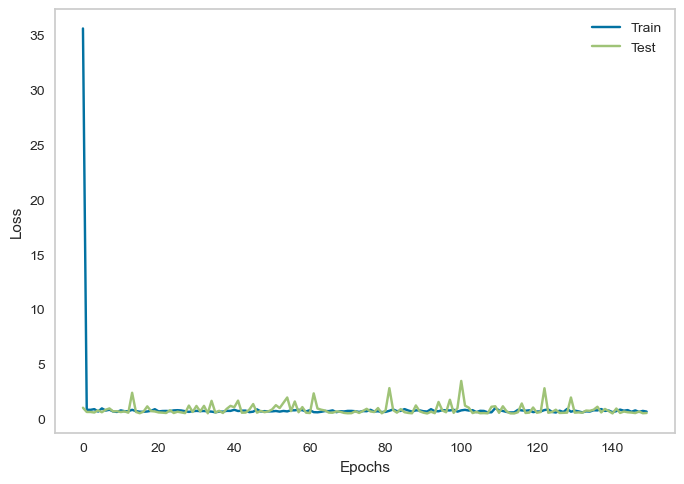

In [517]:
train_loss = model3.history.history["loss"]
val_loss = model3.history.history["val_loss"]
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim((0,20))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

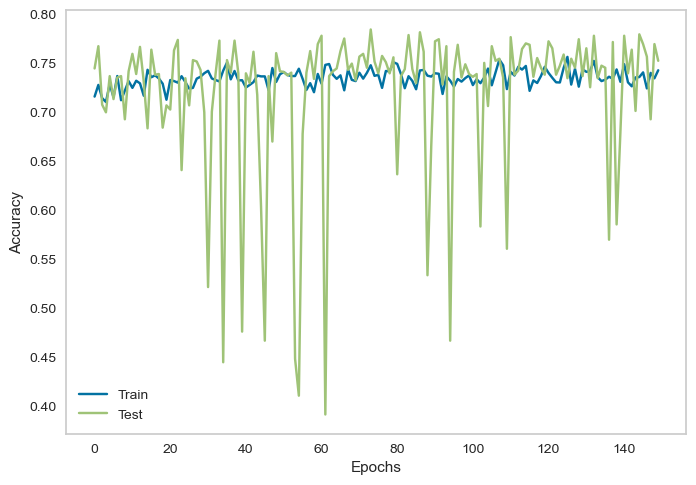

In [518]:
train_acc = model3.history.history["accuracy"]
val_acc = model3.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.grid()
plt.show()